# mlpstyle and DRY for storytelling in matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import duckdb

plt.style.use("styles/base.mplstyle")

df = pd.read_csv("data/jobs_in_data_2024.csv")

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


In [2]:
df.shape

(14199, 12)

In [3]:
df_job_categories = df["job_category"].value_counts()
df_job_categories

job_category
Data Science and Research         4675
Data Engineering                  3157
Data Analysis                     2204
Machine Learning and AI           2148
Leadership and Management          791
BI and Visualization               600
Data Architecture and Modeling     419
Data Management and Strategy       115
Data Quality and Operations         79
Cloud and Database                  11
Name: count, dtype: int64

In [4]:
type(df_job_categories)

pandas.core.series.Series

## Visualizations

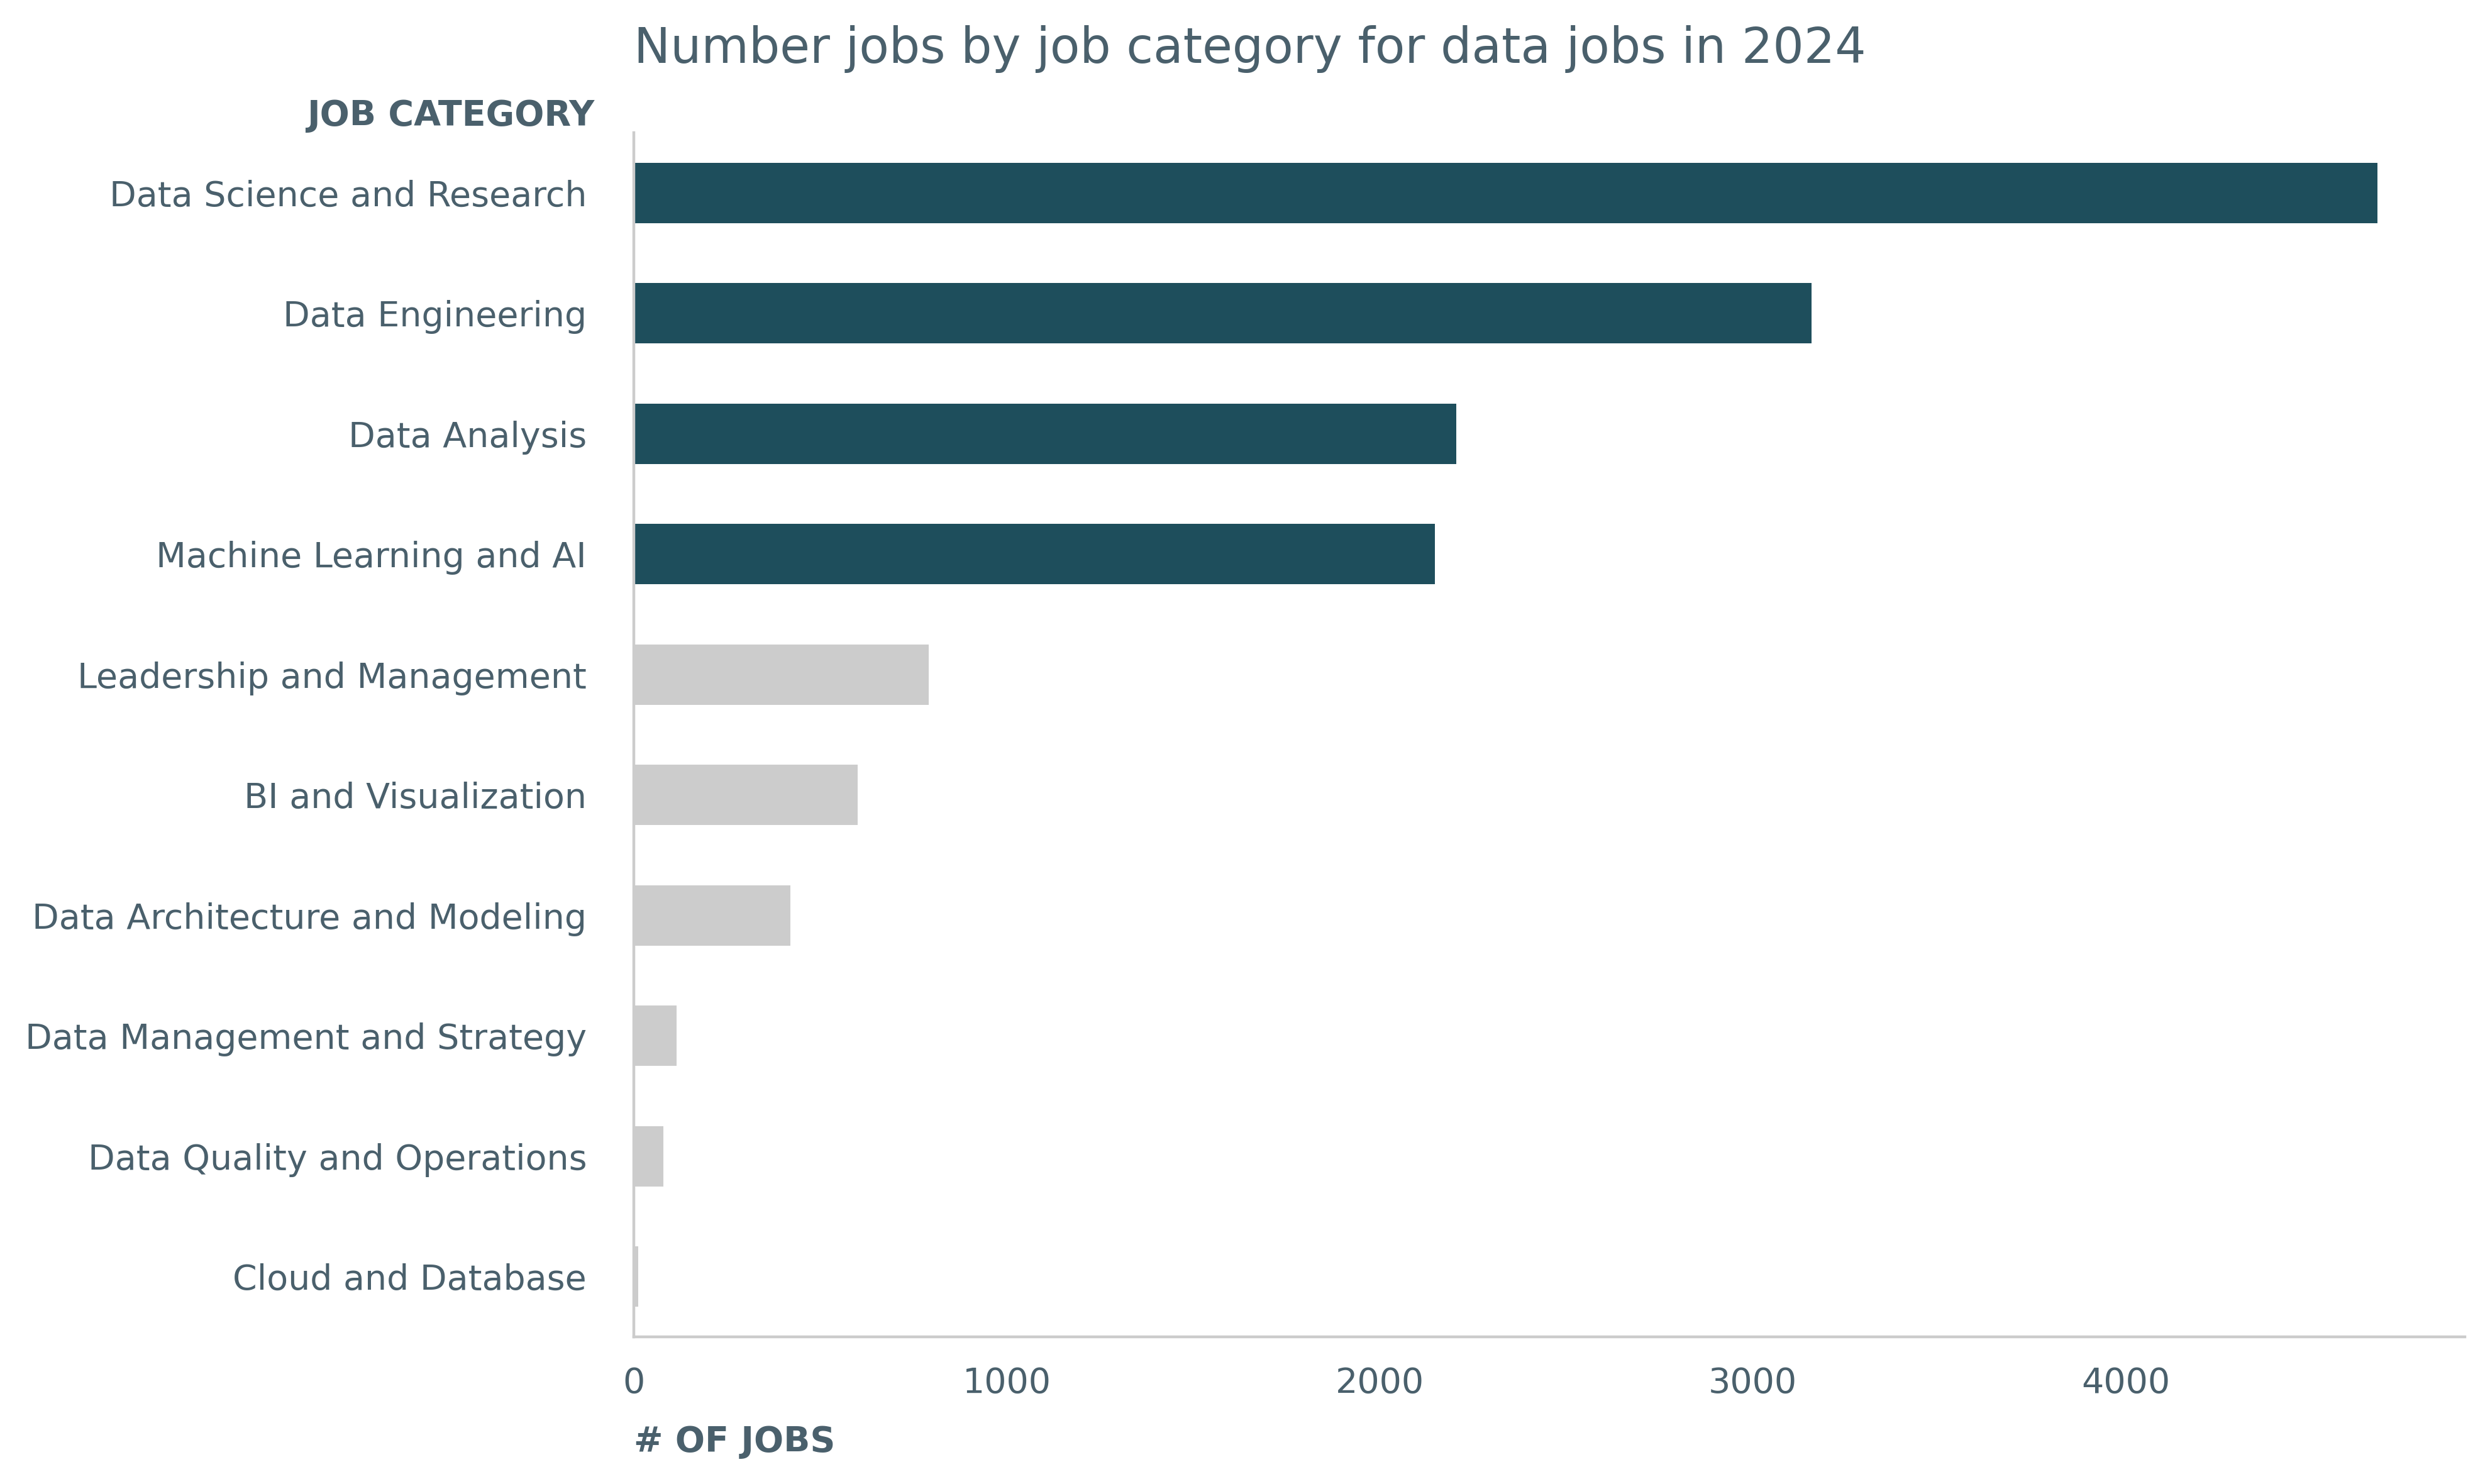

In [5]:
from chart_utils import horizontal_bar_options, save_fig_from_ax
from constants import BLUE_1, GRAY_1

colors = [GRAY_1]*len(df_job_categories)
colors[:4] = [BLUE_1] * 4 

ax = df_job_categories.plot(kind="barh", color=colors)



ax = horizontal_bar_options(
    ax,
    title="Number jobs by job category for data jobs in 2024",
    xlabel="# OF JOBS",
    ylabel="JOB CATEGORY")

save_fig_from_ax(ax, "figures/number_data_jobs.png")

In [6]:
df_salary = (
    duckdb.query(
        """
    SELECT 
        job_category, 
        CAST(AVG(salary_in_usd) AS INT) AS avg_salary_usd
    FROM 
        df
    GROUP BY 
        job_category
    ORDER BY avg_salary_usd DESC             
"""
    )
    .df()
    .set_index("job_category")
)

df_salary

,avg_salary_usd
job_category,
Machine Learning and AI,181873
Data Science and Research,162471
Data Architecture and Modeling,156159
Data Engineering,146720
Cloud and Database,142818
Leadership and Management,142644
BI and Visualization,125803
Data Analysis,106742
Data Quality and Operations,96294


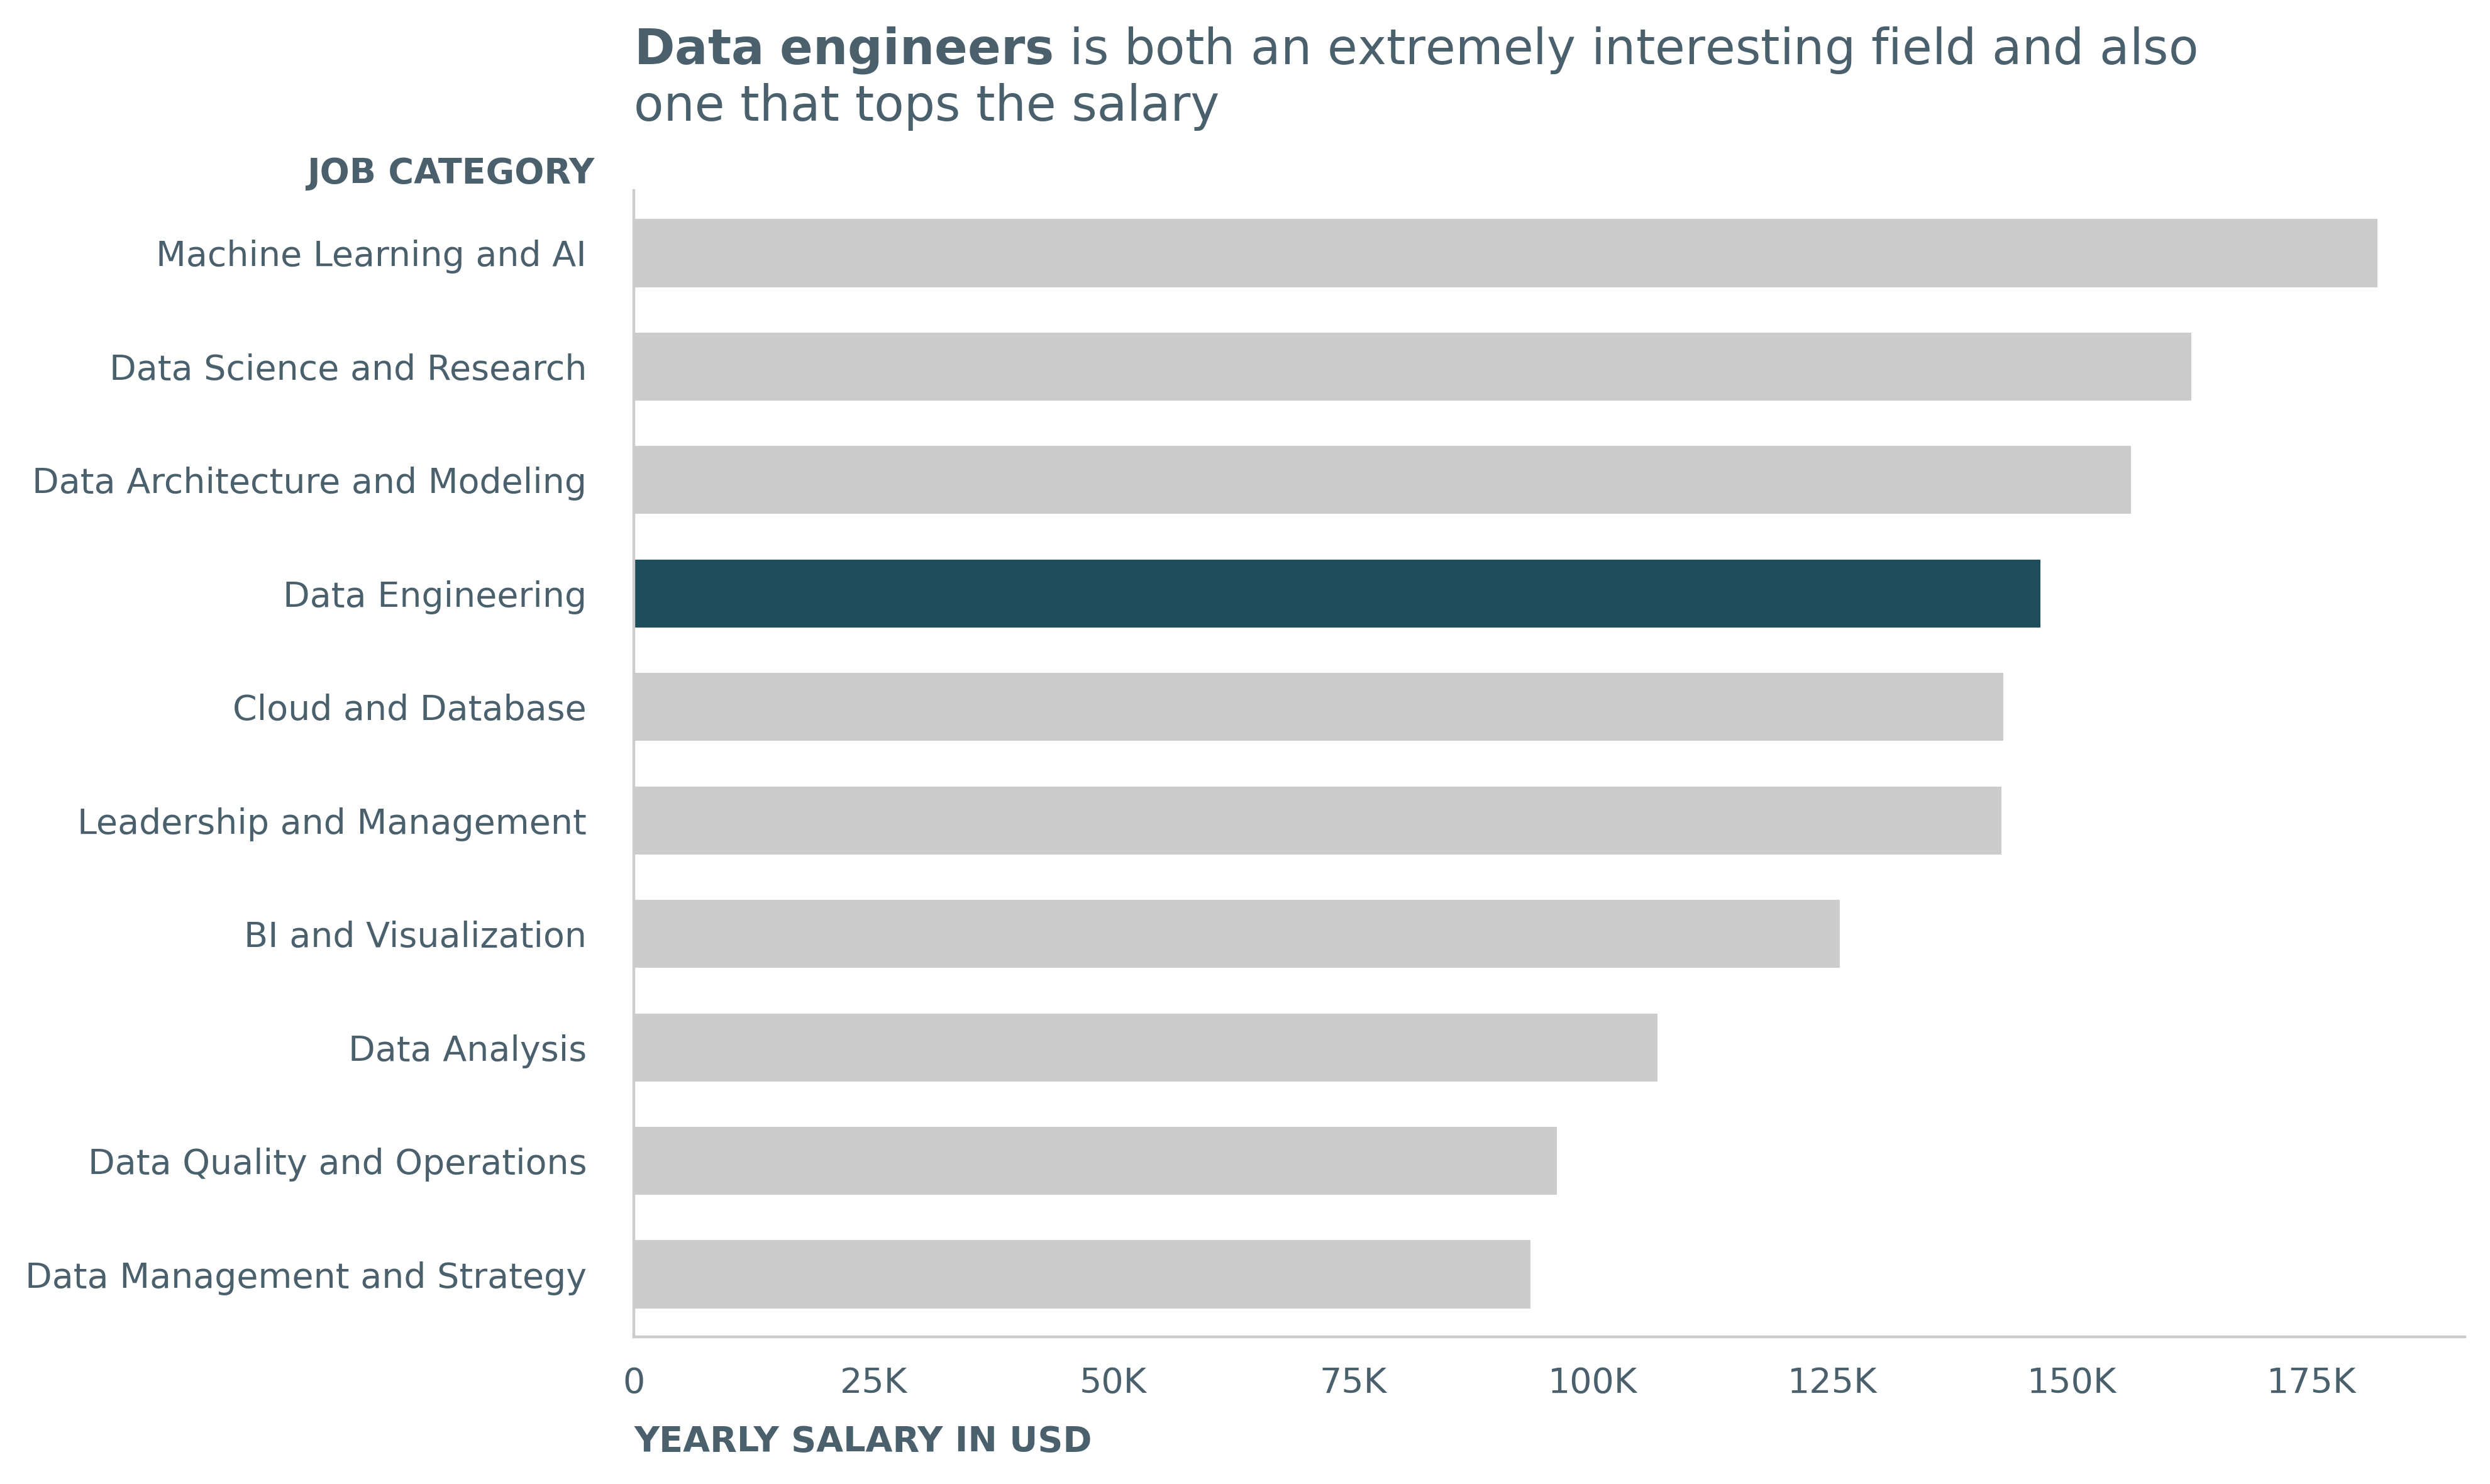

In [7]:
from chart_utils import thousands_formatter

colors = [GRAY_1] * len(df_salary)
colors[3] = BLUE_1

ax = df_salary["avg_salary_usd"].plot(kind="barh", color = colors, width=0.6)

ax = horizontal_bar_options(
    ax, 
    xlabel = "YEARLY SALARY IN USD", 
    ylabel = "JOB CATEGORY", 
    title=r"$\bf{Data\ engineers}$"
    + " is both an extremely interesting field and also \none that tops the salary"
)

ax = thousands_formatter(ax, axis= "x")

save_fig_from_ax(ax, "figures/data_jobs_salaries.png")